In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

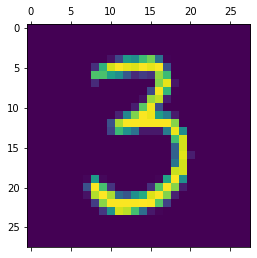

In [4]:
plt.matshow(X_train[50])

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [9]:
X_test_flattened.shape

(10000, 784)

In [10]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 980us/step - loss: 0.7169 - accuracy: 0.8165
Epoch 2/5
1875/1875 [==============================] - 2s 959us/step - loss: 0.3066 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 891us/step - loss: 0.2732 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 2s 902us/step - loss: 0.2655 - accuracy: 0.9254


In [12]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2700 - accuracy: 0.9229


[0.27003753185272217, 0.9229000210762024]

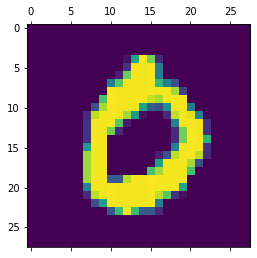

In [13]:
plt.matshow(X_test[3])

In [14]:
y_predicted = model.predict(X_test_flattened)
y_predicted[3]

array([9.9943936e-01, 9.6624646e-09, 6.3791722e-02, 1.3244450e-02,
       4.4175049e-05, 1.2046638e-01, 1.4111170e-01, 2.2620231e-02,
       2.1432787e-02, 1.9995987e-02], dtype=float32)

In [15]:
np.argmax(y_predicted[3])

0

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted] 
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    7,    3,    1,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   7,    9,  906,   25,    9,    4,   12,   12,   45,    3],
       [   1,    0,   12,  935,    0,   20,    2,   14,   20,    6],
       [   1,    1,    4,    2,  917,    0,   11,    4,   10,   32],
       [   9,    1,    3,   41,   10,  770,   13,    7,   31,    7],
       [  11,    3,    5,    1,    7,   14,  913,    2,    2,    0],
       [   1,    5,   20,    8,    7,    1,    0,  957,    3,   26],
       [   6,    6,    7,   31,    9,   25,    9,   14,  860,    7],
       [  11,    6,    1,   11,   33,    8,    0,   32,    4,  903]])>

Text(69.0, 0.5, 'Truth')

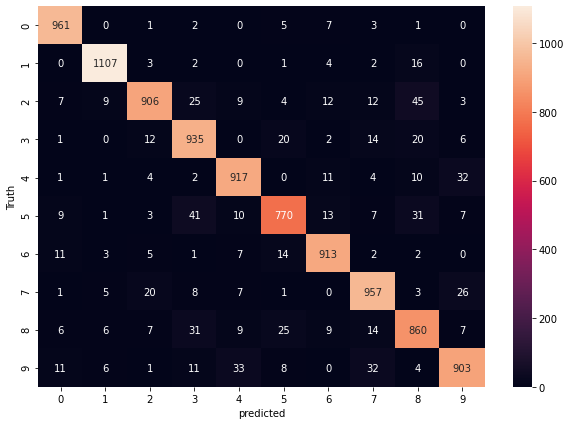

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 8s 2ms/step - loss: 0.4591 - accuracy: 0.8728
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1315 - accuracy: 0.9612
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9736
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0644 - accuracy: 0.9801
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0491 - accuracy: 0.9852
Epoch 6/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0366 - accuracy: 0.9893


In [21]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 1ms/step - loss: 0.0763 - accuracy: 0.9774


[0.0762723833322525, 0.977400004863739]

Text(69.0, 0.5, 'Truth')

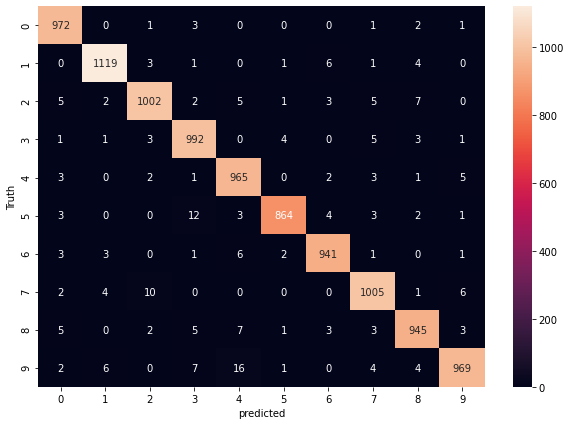

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted] 
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=6, callbacks=[tb_callback])

Epoch 1/6
1875/1875 [==============================] - 61s 23ms/step - loss: 1.0614 - accuracy: 0.7190
Epoch 2/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3533 - accuracy: 0.9009
Epoch 3/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2996 - accuracy: 0.9169
Epoch 4/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9241
Epoch 5/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2462 - accuracy: 0.9308
Epoch 6/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2324 - accuracy: 0.9340
